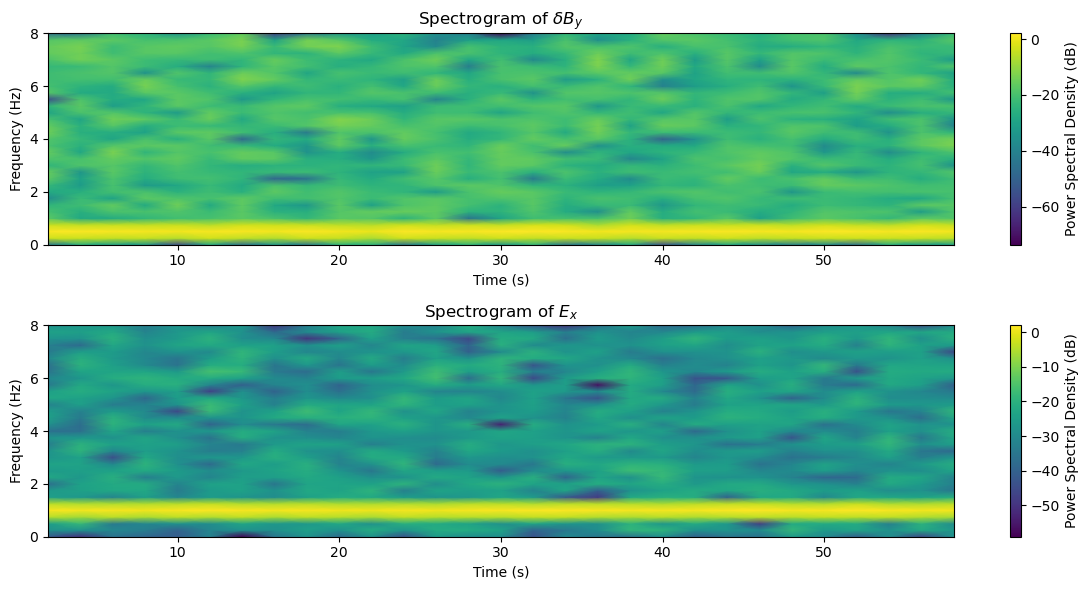

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, resample

# 假设我们有50 Hz的采样数据
sampling_rate_original = 50  # 原始采样率
sampling_rate_target = 16    # 目标采样率
duration = 60  # 信号长度，单位：秒
time_original = np.arange(0, duration, 1 / sampling_rate_original)

# 创建示例信号
delta_By = np.sin(2 * np.pi * 0.5 * time_original) + 0.5 * np.random.randn(len(time_original))
Ex = np.cos(2 * np.pi * 1.0 * time_original) + 0.3 * np.random.randn(len(time_original))

# 重采样到16 Hz
num_samples_target = int(len(delta_By) * sampling_rate_target / sampling_rate_original)
delta_By_resampled = resample(delta_By, num_samples_target)
Ex_resampled = resample(Ex, num_samples_target)
time_resampled = np.arange(0, duration, 1 / sampling_rate_target)

# 计算频谱图
window_length = 4  # 窗长4秒
nperseg = int(window_length * sampling_rate_target)  # 每个窗的采样点数
noverlap = nperseg // 2  # 50%重叠

# 对𝛿𝐵𝑦和𝐸𝑥分别计算频谱图
frequencies, times, Sxx_delta_By = spectrogram(delta_By_resampled, fs=sampling_rate_target,
                                               window='hann', nperseg=nperseg, noverlap=noverlap)
_, _, Sxx_Ex = spectrogram(Ex_resampled, fs=sampling_rate_target,
                           window='hann', nperseg=nperseg, noverlap=noverlap)

# 绘制频谱图
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_delta_By), shading='gouraud')
plt.colorbar(label='Power Spectral Density (dB)')
plt.title('Spectrogram of $\delta B_y$')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_Ex), shading='gouraud')
plt.colorbar(label='Power Spectral Density (dB)')
plt.title('Spectrogram of $E_x$')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Example array with shape (33, 299)
data = np.random.rand(33, 299)

# Split the array
step = 11
result = [data[:, i:i+step] for i in range(0, data.shape[1] - step, step)]

# Add the remaining columns to the last segment
remainder = data[:, step * len(result):]
if remainder.size > 0:
    if len(result) > 0:
        # Append remaining columns to the last split
        result[-1] = np.hstack((result[-1], remainder))
    else:
        # If there's no initial split, the remainder is the only result
        result.append(remainder)

# Convert result to a NumPy array (optional)
print(f"Number of resulting arrays: {len(result)}")
for idx, arr in enumerate(result):
    print(f"Shape of array {idx}: {arr.shape}")

Number of resulting arrays: 27
Shape of array 0: (33, 11)
Shape of array 1: (33, 11)
Shape of array 2: (33, 11)
Shape of array 3: (33, 11)
Shape of array 4: (33, 11)
Shape of array 5: (33, 11)
Shape of array 6: (33, 11)
Shape of array 7: (33, 11)
Shape of array 8: (33, 11)
Shape of array 9: (33, 11)
Shape of array 10: (33, 11)
Shape of array 11: (33, 11)
Shape of array 12: (33, 11)
Shape of array 13: (33, 11)
Shape of array 14: (33, 11)
Shape of array 15: (33, 11)
Shape of array 16: (33, 11)
Shape of array 17: (33, 11)
Shape of array 18: (33, 11)
Shape of array 19: (33, 11)
Shape of array 20: (33, 11)
Shape of array 21: (33, 11)
Shape of array 22: (33, 11)
Shape of array 23: (33, 11)
Shape of array 24: (33, 11)
Shape of array 25: (33, 11)
Shape of array 26: (33, 13)
